## Question 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [6]:
df = pd.read_csv('gender_feature_vectors.csv')
classes = df['Unnamed: 1']
df.drop(columns=['Unnamed: 1','Unnamed: 0'], axis=1, inplace=True)
df['target'] = classes
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567,male
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930,male
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116,male
3,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462,male
4,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135,male
5,-0.149119,0.125288,0.142323,-0.009087,-0.031394,-0.123533,0.043598,-0.063999,0.162439,-0.086513,...,0.089529,-0.034872,0.057080,-0.137162,-0.072522,0.052731,-0.141460,0.019018,0.085765,male
6,-0.139035,0.073513,-0.001770,-0.034225,-0.101610,0.065105,-0.014420,-0.054993,0.134674,-0.058293,...,-0.002164,0.060377,0.080294,-0.139369,-0.150245,0.078657,0.024194,0.062180,0.036039,male
7,-0.074126,-0.000669,0.004166,-0.082413,-0.096091,-0.021992,0.009714,-0.056961,0.174237,-0.056700,...,0.038932,0.023520,-0.090260,-0.147692,-0.008296,0.007609,-0.026687,-0.017523,-0.038310,male
8,-0.166220,0.042769,-0.031647,-0.036892,-0.143837,-0.040566,0.042541,-0.122923,0.188971,-0.036112,...,-0.049135,0.081770,-0.027199,-0.096941,-0.094661,0.057797,-0.101063,0.061373,0.062176,male
9,-0.185770,0.154008,0.073184,-0.070829,-0.144617,-0.019732,-0.019418,-0.004675,0.152325,0.017508,...,0.035101,-0.147997,-0.046010,-0.087777,-0.100660,0.036190,0.012158,0.032304,0.085996,male


In [17]:
male = df.query('target == "male"')
female = df.query('target == "female"')

test_data = male.head(10)
test_data = test_data.append(female.head(10))
test_data.reset_index(drop=True,inplace=True)
train_data = df.drop(test_data.index, axis=0)
train_data.reset_index(drop=True,inplace=True)

In [18]:
X = train_data.iloc[:,:-1]

threshold = 0.95

mean_ = np.mean(X, axis=0)

# Centering the data
X_meaned = X - mean_

# Calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned , rowvar = False)

# Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# Sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index].astype(np.float64)

# Similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# calculate the percentage of explained variance per principal component
cumul_eigenvalue = sorted_eigenvalue.cumsum()
cumul_on_total = cumul_eigenvalue / cumul_eigenvalue[-1]

num_components = 0
while(cumul_on_total[num_components] < threshold):
    num_components += 1
num_components += 1

print('The number of features have been reduced from {} to {} for a threshold of {}% variance.'.format(X.shape[1],num_components,threshold*100))

eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

# Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

The number of features have been reduced from 128 to 57 for a threshold of 95.0% variance.


In [19]:
principal_df = pd.DataFrame(X_reduced , columns = ['col'+str(i) for i in range(1,num_components+1)])
principal_df = pd.concat([principal_df , train_data['target']] , axis = 1)

In [20]:
classifier = GaussianNB()
classifier.fit(principal_df[['col'+str(i) for i in range(1,num_components+1)]], principal_df['target'])

GaussianNB()

In [21]:
test_reduced = (eigenvector_subset.T @ (test_data.iloc[:,:-1] - mean_).T).T
predicted = classifier.predict(test_reduced)
test_reduced = pd.concat([test_reduced, test_data['target']], axis = 1)

In [22]:
test_reduced['predicted'] = predicted
acc = []
for i in range(len(test_reduced)):
    if test_reduced['target'][i] == test_reduced['predicted'][i]:
        acc.append("correct")
    else:
        acc.append("wrong")

test_reduced["correctness"] = acc
x = accuracy_score(test_reduced["target"], predicted)
print("Accuracy =",x*100,"%")

Accuracy = 85.0 %


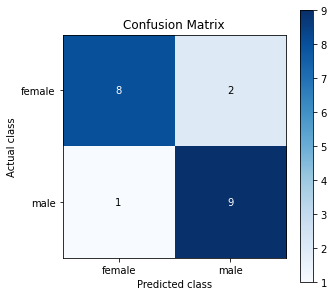

In [28]:
skplt.metrics.plot_confusion_matrix(test_reduced["target"], predicted, figsize=(5,5))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')

plt.savefig("q1_confusion_matrix")
plt.show()